In [110]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import seaborn as sns
import hvplot.pandas

In [111]:
# load prediction data
# df = pd.read_csv(
#     "../local_prediction_checkup_bucket/sensor_predictions_output.csv", na_values="na", index_col=0
# )

# cache data to improve dashboard performance
if "data" not in pn.state.cache.keys():

    df = pd.read_csv("../local_prediction_checkup_bucket/sensor_predictions_output.csv")

    pn.state.cache["data"] = df.copy()

else:

    df = pn.state.cache["data"]

In [112]:
df

,Unnamed: 0,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,0,30942,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,170826.0,311574.0,163638.0,119818.0,77416.0,148150.0,16820.0,0.0,0.0,neg
1,1,1830,1.340000e+02,120.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5354.0,42310.0,30258.0,370.0,16.0,0.0,0.0,0.0,0.0,neg
2,2,42016,2.430000e+03,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127790.0,297374.0,371010.0,421102.0,301490.0,107790.0,58.0,0.0,0.0,neg
3,3,1230,8.800000e+01,84.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1074.0,3382.0,48444.0,14.0,0.0,0.0,0.0,0.0,0.0,neg
4,4,35326,2.130706e+09,306.0,0.0,0.0,0.0,0.0,25228.0,540628.0,...,56520.0,146682.0,390006.0,563856.0,233684.0,9678.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,6996,40880,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,166698.0,975528.0,126684.0,37770.0,140414.0,20676.0,286.0,0.0,0.0,neg
6997,6997,33212,2.060000e+02,156.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112518.0,321938.0,487638.0,292516.0,89156.0,1442.0,0.0,0.0,0.0,neg
6998,6998,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
6999,6999,230304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neg


In [113]:
df = df.drop(columns=["Unnamed: 0"]).reset_index(drop=True)
df

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,30942,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5532.0,...,170826.0,311574.0,163638.0,119818.0,77416.0,148150.0,16820.0,0.0,0.0,neg
1,1830,1.340000e+02,120.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,...,5354.0,42310.0,30258.0,370.0,16.0,0.0,0.0,0.0,0.0,neg
2,42016,2.430000e+03,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0,...,127790.0,297374.0,371010.0,421102.0,301490.0,107790.0,58.0,0.0,0.0,neg
3,1230,8.800000e+01,84.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,...,1074.0,3382.0,48444.0,14.0,0.0,0.0,0.0,0.0,0.0,neg
4,35326,2.130706e+09,306.0,0.0,0.0,0.0,0.0,25228.0,540628.0,1335678.0,...,56520.0,146682.0,390006.0,563856.0,233684.0,9678.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,40880,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,176.0,...,166698.0,975528.0,126684.0,37770.0,140414.0,20676.0,286.0,0.0,0.0,neg
6997,33212,2.060000e+02,156.0,0.0,0.0,0.0,0.0,0.0,0.0,1324.0,...,112518.0,321938.0,487638.0,292516.0,89156.0,1442.0,0.0,0.0,0.0,neg
6998,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
6999,230304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neg


In [139]:
df.columns

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009',
       'ef_000', 'eg_000', 'class'],
      dtype='object', length=164)

In [140]:
# df.count(df['class'] == 'pos')

df['class'].value_counts()

class
neg    6811
pos     190
Name: count, dtype: int64

In [116]:
# number of faults due to APS failure
df['class'].value_counts()['pos']


190

<Axes: xlabel='class', ylabel='count'>

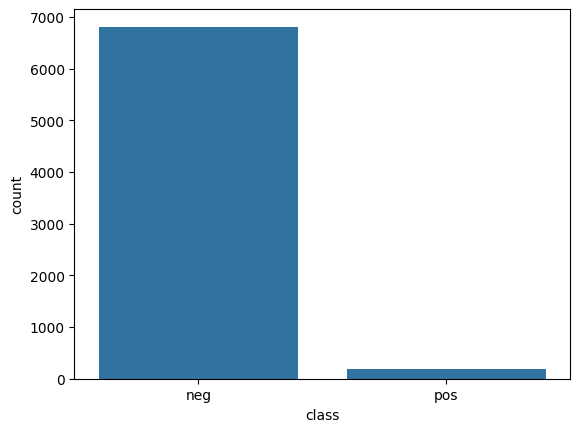

In [117]:
sns.countplot(x='class', data=df)

In [174]:
# def calculate_fault_rate(data, sensor_column):
#     total_records = len(data)
#     faults = len(data[data["class"] == "pos" & data[sensor_column]])
#     fault_rate = faults / total_records
#     return fault_rate


# (1) Table: Top 20 sensors with highest fault rate during APS failure.

In [119]:
sensors_readings = df.iloc[:, 0:df.shape[1]-1]
sensors_readings





# for sensor in sensor_columns:
#     fault_rate = calculate_fault_rate(df, sensor)
#     # Store sensor name and fault rate in a dictionary or list
#     sensor_fault_rate = {sensor: fault_rate}

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,30942,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5532.0,...,351378.0,170826.0,311574.0,163638.0,119818.0,77416.0,148150.0,16820.0,0.0,0.0
1,1830,1.340000e+02,120.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,...,7636.0,5354.0,42310.0,30258.0,370.0,16.0,0.0,0.0,0.0,0.0
2,42016,2.430000e+03,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0,...,224994.0,127790.0,297374.0,371010.0,421102.0,301490.0,107790.0,58.0,0.0,0.0
3,1230,8.800000e+01,84.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,...,2666.0,1074.0,3382.0,48444.0,14.0,0.0,0.0,0.0,0.0,0.0
4,35326,2.130706e+09,306.0,0.0,0.0,0.0,0.0,25228.0,540628.0,1335678.0,...,108604.0,56520.0,146682.0,390006.0,563856.0,233684.0,9678.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,40880,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,176.0,...,414560.0,166698.0,975528.0,126684.0,37770.0,140414.0,20676.0,286.0,0.0,0.0
6997,33212,2.060000e+02,156.0,0.0,0.0,0.0,0.0,0.0,0.0,1324.0,...,215922.0,112518.0,321938.0,487638.0,292516.0,89156.0,1442.0,0.0,0.0,0.0
6998,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6999,230304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
sensor_columns = sensors_readings.columns
sensor_columns

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=163)

In [121]:
# Calculate fault rate for each sensor column vs class

# Calculate fault rate for each sensor column vs class
fault_rates = {
    sensor: (len(df[(df["class"] == "pos") & (df[sensor])]) / len(df))*100
    for sensor in sensor_columns
}


# fault_rates = []
# for sensor in sensor_columns:
#     total_records = len(df)
#     faults = len(df[(df["class"] == "pos") & (df[sensor])])
#     fault_rate = faults / total_records
#     fault_rates.append(fault_rate)


# for sensor in sensor_columns:
#     sns.countplot(x='class', data=df, hue=sensor)
#     print(sensor)
#     print(df[sensor].value_counts())

In [122]:
fault_rates

{'aa_000': 0.0,
 'ac_000': 1.0141408370232825,
 'ad_000': 0.8713040994143695,
 'ae_000': 0.028567347521782603,
 'af_000': 0.028567347521782603,
 'ag_000': 0.3142408227396086,
 'ag_001': 0.9570061419797172,
 'ag_002': 1.4140837023282389,
 'ag_003': 2.013998000285673,
 'ag_004': 2.599628624482217,
 'ag_005': 2.599628624482217,
 'ag_006': 2.599628624482217,
 'ag_007': 2.5853449507213253,
 'ag_008': 2.4567918868733036,
 'ag_009': 1.471218397371804,
 'ah_000': 2.6281959720039993,
 'ai_000': 1.856877588915869,
 'aj_000': 1.2998143122411085,
 'ak_000': 0.09998571632623911,
 'al_000': 2.3568061705470646,
 'am_0': 2.3996571918297387,
 'an_000': 2.599628624482217,
 'ao_000': 2.6281959720039993,
 'ap_000': 2.599628624482217,
 'aq_000': 2.6281959720039993,
 'ar_000': 0.5999142979574347,
 'as_000': 0.014283673760891302,
 'at_000': 0.7856020568490215,
 'au_000': 0.0428510212826739,
 'av_000': 1.2426796171975432,
 'ax_000': 1.2141122696757605,
 'ay_000': 0.2428224539351521,
 'ay_001': 0.2428224539351

In [141]:
len(fault_rates)

163

In [142]:
# Sort the fault rates dictionary by values in descending order
sorted_fault_rates = sorted(fault_rates.items(), key=lambda x: x[1], reverse=True)
sorted_fault_rates

[('ci_000', 2.699614340808456),
 ('ck_000', 2.699614340808456),
 ('bt_000', 2.6853306670475647),
 ('bx_000', 2.656763319525782),
 ('ah_000', 2.6281959720039993),
 ('ao_000', 2.6281959720039993),
 ('aq_000', 2.6281959720039993),
 ('bb_000', 2.6281959720039993),
 ('bi_000', 2.6281959720039993),
 ('bj_000', 2.6281959720039993),
 ('bu_000', 2.6281959720039993),
 ('bv_000', 2.6281959720039993),
 ('cq_000', 2.6281959720039993),
 ('dn_000', 2.6281959720039993),
 ('bs_000', 2.613912298243108),
 ('cb_000', 2.613912298243108),
 ('cd_000', 2.613912298243108),
 ('ag_004', 2.599628624482217),
 ('ag_005', 2.599628624482217),
 ('ag_006', 2.599628624482217),
 ('an_000', 2.599628624482217),
 ('ap_000', 2.599628624482217),
 ('ay_007', 2.599628624482217),
 ('ay_008', 2.599628624482217),
 ('az_000', 2.599628624482217),
 ('az_001', 2.599628624482217),
 ('az_002', 2.599628624482217),
 ('az_003', 2.599628624482217),
 ('az_004', 2.599628624482217),
 ('az_005', 2.599628624482217),
 ('bg_000', 2.599628624482217

In [149]:
# Select the top 20 sensors
top_20_sensors = sorted_fault_rates[:20]
top_20_sensors

[('ci_000', 2.699614340808456),
 ('ck_000', 2.699614340808456),
 ('bt_000', 2.6853306670475647),
 ('bx_000', 2.656763319525782),
 ('ah_000', 2.6281959720039993),
 ('ao_000', 2.6281959720039993),
 ('aq_000', 2.6281959720039993),
 ('bb_000', 2.6281959720039993),
 ('bi_000', 2.6281959720039993),
 ('bj_000', 2.6281959720039993),
 ('bu_000', 2.6281959720039993),
 ('bv_000', 2.6281959720039993),
 ('cq_000', 2.6281959720039993),
 ('dn_000', 2.6281959720039993),
 ('bs_000', 2.613912298243108),
 ('cb_000', 2.613912298243108),
 ('cd_000', 2.613912298243108),
 ('ag_004', 2.599628624482217),
 ('ag_005', 2.599628624482217),
 ('ag_006', 2.599628624482217)]

In [167]:
# Create a DataFrame for the top 10 sensors
# top_20_df = pd.DataFrame(top_20_sensors, columns=["Sensor", "Fault Rate"], index=None)

# Create a DataFrame for the top 10 sensors without specifying column names
top_20_df = pd.DataFrame(top_20_sensors)

# Remove the index column
top_20_df.reset_index(drop=True, inplace=True)

# Rename the columns
top_20_df.columns = ["Sensor", "Fault Rate"]


top_20_df

,Sensor,Fault Rate
0,ci_000,2.699614
1,ck_000,2.699614
2,bt_000,2.685331
3,bx_000,2.656763
4,ah_000,2.628196
5,ao_000,2.628196
6,aq_000,2.628196
7,bb_000,2.628196
8,bi_000,2.628196
9,bj_000,2.628196


In [171]:
top_20_df.columns

Index(['Sensor', 'Fault Rate'], dtype='object')

In [339]:
# Display the table using Panel
table = pn.widgets.Tabulator(top_20_df, height=300, show_index=False)
table

BokehModel(combine_events=True, render_bundle={'docs_json': {'58771844-49e2-44fe-a7a2-326c6ad37fad': {'version…

# (2) Box plot for checking the distribution of the fault rate, of the sensors.

In [187]:
df


,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,30942,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5532.0,...,170826.0,311574.0,163638.0,119818.0,77416.0,148150.0,16820.0,0.0,0.0,neg
1,1830,1.340000e+02,120.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,...,5354.0,42310.0,30258.0,370.0,16.0,0.0,0.0,0.0,0.0,neg
2,42016,2.430000e+03,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0,...,127790.0,297374.0,371010.0,421102.0,301490.0,107790.0,58.0,0.0,0.0,neg
3,1230,8.800000e+01,84.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,...,1074.0,3382.0,48444.0,14.0,0.0,0.0,0.0,0.0,0.0,neg
4,35326,2.130706e+09,306.0,0.0,0.0,0.0,0.0,25228.0,540628.0,1335678.0,...,56520.0,146682.0,390006.0,563856.0,233684.0,9678.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,40880,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,176.0,...,166698.0,975528.0,126684.0,37770.0,140414.0,20676.0,286.0,0.0,0.0,neg
6997,33212,2.060000e+02,156.0,0.0,0.0,0.0,0.0,0.0,0.0,1324.0,...,112518.0,321938.0,487638.0,292516.0,89156.0,1442.0,0.0,0.0,0.0,neg
6998,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
6999,230304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neg


In [188]:
# # Select a subset of sensors for box plot comparison
# selected_sensors = ["aa_000", "ac_000", "ci_000", "al_000"]

In [191]:
sorted_fault_rates_df = pd.DataFrame(sorted_fault_rates, columns=["Sensor", "Fault Rate"])
sorted_fault_rates_df

,Sensor,Fault Rate
0,ci_000,2.699614
1,ck_000,2.699614
2,bt_000,2.685331
3,bx_000,2.656763
4,ah_000,2.628196
...,...,...
158,ch_000,0.000000
159,dj_000,0.000000
160,dk_000,0.000000
161,dl_000,0.000000


In [200]:
sorted_fault_rates_sensorNames = sorted_fault_rates_df["Sensor"].tolist()
# type(sorted_fault_rates_sensorNames)
sorted_fault_rates_sensorNames

['ci_000',
 'ck_000',
 'bt_000',
 'bx_000',
 'ah_000',
 'ao_000',
 'aq_000',
 'bb_000',
 'bi_000',
 'bj_000',
 'bu_000',
 'bv_000',
 'cq_000',
 'dn_000',
 'bs_000',
 'cb_000',
 'cd_000',
 'ag_004',
 'ag_005',
 'ag_006',
 'an_000',
 'ap_000',
 'ay_007',
 'ay_008',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'bg_000',
 'bh_000',
 'by_000',
 'cn_004',
 'cn_005',
 'cn_006',
 'cn_007',
 'cn_008',
 'cs_000',
 'cs_001',
 'cs_002',
 'cs_003',
 'cs_004',
 'cs_005',
 'cs_006',
 'ee_000',
 'ee_001',
 'ee_002',
 'ag_007',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'bk_000',
 'bl_000',
 'bm_000',
 'cn_003',
 'ee_003',
 'ee_004',
 'ee_005',
 'ee_006',
 'ee_007',
 'ee_008',
 'cc_000',
 'cn_002',
 'ag_008',
 'ba_008',
 'am_0',
 'al_000',
 'az_006',
 'cn_009',
 'ay_006',
 'ba_009',
 'ag_003',
 'cs_007',
 'ai_000',
 'ed_000',
 'cn_001',
 'ec_00',
 'be_000',
 'dd_000',
 'bd_000',
 'bz_000',
 'de_000',
 'do_000',
 'dp_000',
 'ds_000',
 '

In [238]:
# Select a subset of sensors for box plot comparison
# 163/2 = 81.5 # we can select 1stm 81st and 163rd sensor
selected_sensors = [sorted_fault_rates_sensorNames[0], sorted_fault_rates_sensorNames[-81], sorted_fault_rates_sensorNames[-1]]
selected_sensors

['ci_000', 'ec_00', 'dm_000']

In [312]:
# Create a Panel row to hold the box plots
box_plots = pn.Row()



In [313]:
# Loop through selected sensors and create box plots for each
# for sensor in selected_sensors:
#     plot = df.hvplot.box(y=sensor, by="class", title=sensor, width=400, height=300)
#     box_plots.append(plot)

# Loop through selected sensors and create box plots for each
for sensor in selected_sensors:
    plot = df.hvplot.box(
        y=sensor, by="class", title=sensor, xlabel="", ylabel="", width=400, height=300
    )
    box_plots.append(plot)

In [218]:
# # Wrap the column of box plots inside a scrollable container
# scrollable_box_plots = pn.pane.HTML(
#     box_plots._repr_html_(), height=350, style={"overflow": "auto"}
# )

In [219]:
# Display the interactive dashboard
# scrollable_box_plots.servable()

In [321]:
# Display the interactive dashboard
# box_plots.servable()

# (3) Cost Analysis

## First lets make some assumptions related to baseline costs:

In [250]:

# Define assumptions
preemptive_checkup_cost = 300  # CAD per truck
truck_repair_cost_due_to_APS_failure = 2000  # CAD per truck
total_trucks = 30
average_aps_failures_per_month = 5

In [253]:
# Create DataFrame for one year breakdown of total monthly costs
months = range(1, 13)
preemptive_checkup_costs = [preemptive_checkup_cost * total_trucks] * 12
aps_failure_costs = [
    truck_repair_cost_due_to_APS_failure * average_aps_failures_per_month
] * 12


In [256]:
total_costs = [
    preemptive + aps_failure
    for preemptive, aps_failure in zip(preemptive_checkup_costs, aps_failure_costs)
]
total_costs

[19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000,
 19000]

In [257]:
costs_df = pd.DataFrame(
    {
        "Month": months,
        "Preemptive Checkup Costs": preemptive_checkup_costs,
        "APS Failure Costs": aps_failure_costs,
        "Total Monthly Costs": total_costs,
    }
)

print(costs_df)

    Month  Preemptive Checkup Costs  APS Failure Costs  Total Monthly Costs
0       1                      9000              10000                19000
1       2                      9000              10000                19000
2       3                      9000              10000                19000
3       4                      9000              10000                19000
4       5                      9000              10000                19000
5       6                      9000              10000                19000
6       7                      9000              10000                19000
7       8                      9000              10000                19000
8       9                      9000              10000                19000
9      10                      9000              10000                19000
10     11                      9000              10000                19000
11     12                      9000              10000                19000


So, company has $19000 monthly cost just make sure truck or heavy duty vehicle is working fine. It makes yearly cost of $228000.

In [258]:
# Load the predicted and original classifications from CSV files
# predicted_classification = pd.read_csv("predicted_classification.csv")
# original_classification = pd.read_csv("original_classification.csv")

# cache data to improve dashboard performance
if "data" not in pn.state.cache.keys():

    original_classification = pd.read_csv(
        "../local_prediction_checkup_bucket/sensor_pred_input_data.csv"
    )

    pn.state.cache["data"] = df.copy()

else:

    original_classification = pn.state.cache["data"]

In [268]:
# Calculate the number of false positive and false negative predictions
false_positives = (
    (original_classification == "neg") & (df == "pos")
).sum()
false_negatives = (
    (original_classification == "pos") & (df == "neg")
).sum()

In [269]:
false_positives

Unnamed: 0    0.0
aa_000        0.0
ac_000        0.0
ad_000        0.0
ae_000        0.0
             ... 
ee_007        0.0
ee_008        0.0
ee_009        0.0
ef_000        0.0
eg_000        0.0
Length: 165, dtype: float64

In [270]:
false_negatives

Unnamed: 0    0.0
aa_000        0.0
ac_000        0.0
ad_000        0.0
ae_000        0.0
             ... 
ee_007        0.0
ee_008        0.0
ee_009        0.0
ef_000        0.0
eg_000        0.0
Length: 165, dtype: float64

In [271]:
# Define costs
cost_per_false_positive = 300  # Cost per false positive prediction (USD)
cost_per_false_negative = 2000  # Cost per false negative prediction (USD)


# Calculate the total costs for false positive and false negative predictions
cost_false_positives = false_positives * cost_per_false_positive
cost_false_negatives = false_negatives * cost_per_false_negative

In [273]:
cost_false_negatives

Unnamed: 0    0.0
aa_000        0.0
ac_000        0.0
ad_000        0.0
ae_000        0.0
             ... 
ee_007        0.0
ee_008        0.0
ee_009        0.0
ef_000        0.0
eg_000        0.0
Length: 165, dtype: float64

In [274]:
# Display the total costs
total_cost_false_positives = cost_false_positives.sum()
total_cost_false_negatives = cost_false_negatives.sum()

In [275]:
print(
    "Total Cost of False Positive Predictions: ${}".format(total_cost_false_positives)
)
print(
    "Total Cost of False Negative Predictions: ${}".format(total_cost_false_negatives)
)

Total Cost of False Positive Predictions: $0.0
Total Cost of False Negative Predictions: $0.0


In [291]:
# Calculate false positives and false negatives
precision = 0.838
recall = 0.887
false_positives = 1 - precision
false_negatives = 1 - recall

# Original monthly costs
original_aps_failure_costs = 10000
original_preemptive_checkup_costs = 9000


# Calculate costs associated with false positives and false negatives
cost_false_positives = false_positives * original_preemptive_checkup_costs
cost_false_negatives = false_negatives * original_aps_failure_costs



In [296]:
cost_false_positives


1458.0000000000002

In [297]:
# Calculate total costs after implementing the detection system
total_monthly_cost = original_aps_failure_costs + original_preemptive_checkup_costs
total_monthly_cost_with_detection_system = (
     cost_false_negatives + cost_false_positives
)

print("Total Monthly Cost before Detection System: ${}".format(total_monthly_cost))
print(
    "Total Monthly Cost after Detection System: ${}".format(
        total_monthly_cost_with_detection_system
    )
)

Total Monthly Cost before Detection System: $19000
Total Monthly Cost after Detection System: $2588.0


So, with this detection system, monthly cost will $2588, which makes yearly cost of $31056.
This is 86% less than the current cost.

In [303]:
# Define original and modified monthly costs
original_monthly_cost = total_monthly_cost
modified_monthly_cost = total_monthly_cost_with_detection_system



2588.0

In [306]:
# Create a DataFrame to hold the data
data = pd.DataFrame(
    {
        "Monthly Cost": [original_monthly_cost, modified_monthly_cost],
        "Status": ["Before Detection System", "After Detection System"],
    }
)



In [335]:
# Plot the data using hvplot
bar_plot = data.hvplot.bar(
    x="Status",
    y="Monthly Cost",
    title="Monthly Costs Before and After Detection System",
    ylabel="Monthly Cost (CAD)",
    xlabel="Change in Monthly Cost",
    rot=45,
)
bar_plot
# # Combine the plot into a Panel dashboard
# dashboard = pn.Column("# Monthly Costs Before and After Detection System", plot)

# # Show the dashboard
# dashboard.servable()

:Bars   [Status]   (Monthly Cost)

In [340]:
# Layout using Template
template = pn.template.FastListTemplate(
    title="APS Sensor Fault Detection System Dashboard",
    sidebar=[
        pn.pane.Markdown("# Detection System Dashboard"),
        # pn.pane.Markdown(
        #     "#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."
        # ),
        # pn.pane.PNG("climate_day.png", sizing_mode="scale_both"),
        # pn.pane.Markdown("## Settings"),
        # year_slider,
    ],
    main=[
        pn.Row(
            pn.Column(
                pn.pane.Markdown(
                    "#### Box Plots of Sensor Readings: Graphs of Highest, Median, and Lowest Fault Rate Sensors"
                ),
                box_plots,
            ),
        ),
        pn.Row(
            pn.Column(
                # pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0, 25)),
                pn.pane.Markdown(
                    "#### Table of Top 20 Sensors with Highest Fault Rates: Ordered from Highest to Lowest Fault Rate Sensors"
                ),
                table,
            ),
            pn.Column(
                pn.pane.Markdown("## Monthly Costs Before and After Detection System"),
                bar_plot,
            ),
        ),
    ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [140654857211088] Row
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=400)
                [1] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=400)
                [2] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=400)
    [140654728144160] Row
        [0] Column
            [0] Markdown(str)
            [1] Tabulator(height=300, show_index=False, value=    Sensor  Fault R...)
        [1] Column
            [0] Markdown(str)
            [1] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [140654717290624] Markdown(str)
    [140654717290672] Markdown(str)

In [319]:
# # Layout using Template
# template = pn.template.FastListTemplate(
#     title="Detection System Dashboard",
#     sidebar=[
#         pn.pane.Markdown("# Detection System Dashboard"),
#         pn.pane.Markdown("#### Table of Top 20 Sensors with Highest Fault Rates"),
#         table,
#         pn.pane.Markdown("#### Box Plots of Sensor Readings"),
#         box_plots,
#     ],
#     main=[
#         pn.pane.Markdown("## Monthly Costs Before and After Detection System"),
#         bar_plot,
#     ],
#     accent_base_color="#88d8b0",
#     header_background="#88d8b0",
# )

# # Show the dashboard
# template.servable()

In [288]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [320]:
# # Calculate metrics for original and predicted data
# accuracy_original = accuracy_score(original_classification, df)
# precision_original = precision_score(
#     original_classification, df
# )
# recall_original = recall_score(
#     original_classification, df
# )
# f1_original = f1_score(
#     original_classification, df
# )


In [ ]:
# # Print metrics for original data
# print("Accuracy for Original Data:", accuracy_original)
# print("Precision for Original Data:", precision_original)
# print("Recall for Original Data:", recall_original)
# print("F1 Score for Original Data:", f1_original)

In [284]:
# Assuming the predicted classifications and original classifications are aligned by index

# Filter trucks with APS-related failures
# aps_failure_trucks = df[original_classification["class"] == "pos"]



In [285]:
# len(aps_failure_trucks)

190

In [286]:
# Calculate the total cost of APS repairs
# cost_per_aps_repair = 2000  # Cost per APS repair (USD)
# total_cost_aps_repairs = len(aps_failure_trucks) * cost_per_aps_repair


In [287]:
# Display the total cost of APS repairs
# print("Total Cost of APS Repairs: ${}".format(total_cost_aps_repairs)) 

Total Cost of APS Repairs: $380000


In [267]:
# # Create a DataFrame to hold the cost analysis data
# cost_analysis_data = pd.DataFrame(
#     {
#         "Time Period": ["Before Implementation", "After Implementation"],
#         "Costs (USD)": [cost_false_positives_before, cost_false_positives_after],
#     }
# )





In [266]:
# # Create a Panel DataFrame to display the cost analysis
# cost_analysis_panel = pn.pane.DataFrame(cost_analysis_data)

# # Display the Panel dashboard
# cost_analysis_panel.servable()